In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import os
import numpy as np
import pandas as pd
import pickle

In [3]:
path=pathlib.Path('/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ml')
path

PosixPath('/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ml')

In [4]:
df = pd.read_csv(path/'ratings_files.csv')
df.tail()

,filename,rating
35,T36A_heat_ml,Anger
36,T37A_heat_ml,Disgust
37,T38A_heat_ml,Disgust
38,T39A_heat_ml,Contempt
39,T40A_heat_ml,Anger


In [5]:
# from PIL import Image
# for i in range (1,41):
    
#     im = Image.open(r"/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ml/heatmaps_SA/T"+str(i)+"A_heat_ml.png")
#     im1=im.crop((0,0,1458,1458))
#     im1.save("/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ml/heatmaps_SA/T"+str(i)+"A_heat_ml.png")

In [6]:
src = (ImageList.from_csv(path, 'ratings_files.csv', folder='heatmaps_SA', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['rating'],label_cls=CategoryList)
       .transform()
       .databunch(bs=2)
       .normalize())

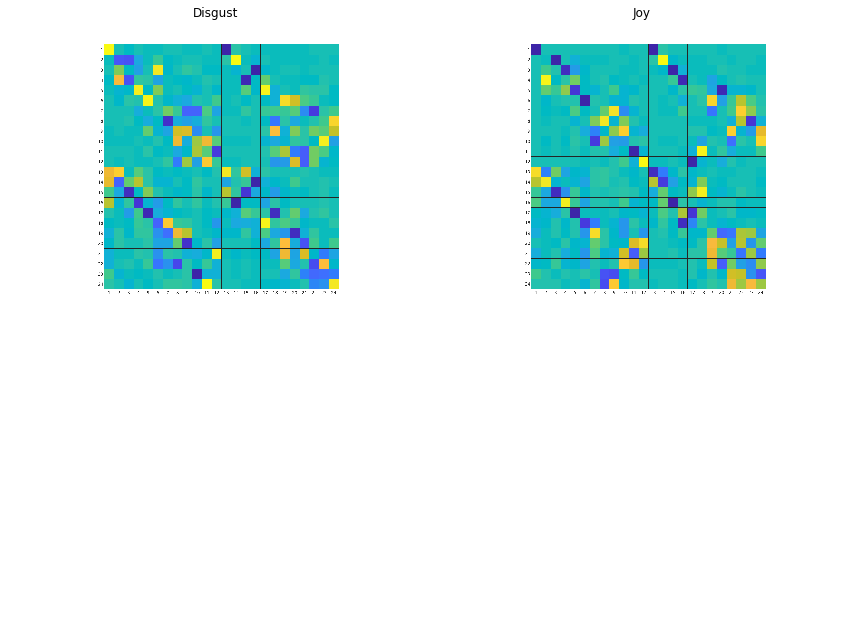

In [7]:
src.show_batch(rows=4, figsize=(12,9))

In [8]:
learn = cnn_learner(src, models.resnet34, metrics=accuracy)

In [9]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 729, 729]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 729, 729]       128        True      
______________________________________________________________________
ReLU                 [64, 729, 729]       0          False     
______________________________________________________________________
MaxPool2d            [64, 365, 365]       0          False     
______________________________________________________________________
Conv2d               [64, 365, 365]       36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 365, 365]       128        True      
______________________________________________________________________
ReLU                 [64, 365, 365]       0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


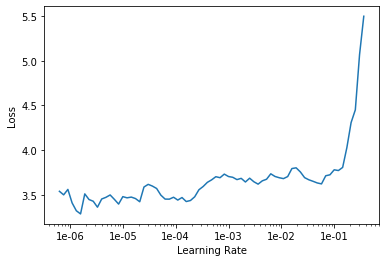

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
lr = 3e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,3.545688,5.045498,0.125000,00:06
1,3.683985,2.854002,0.125000,00:05
2,3.265561,2.599362,0.250000,00:06
3,2.851173,2.960996,0.125000,00:06
4,2.731978,2.880780,0.125000,00:06


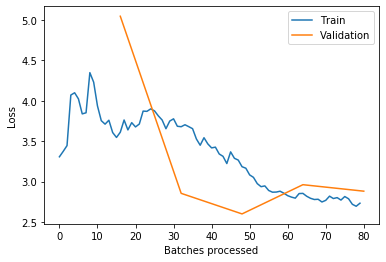

In [12]:
learn.recorder.plot_losses()

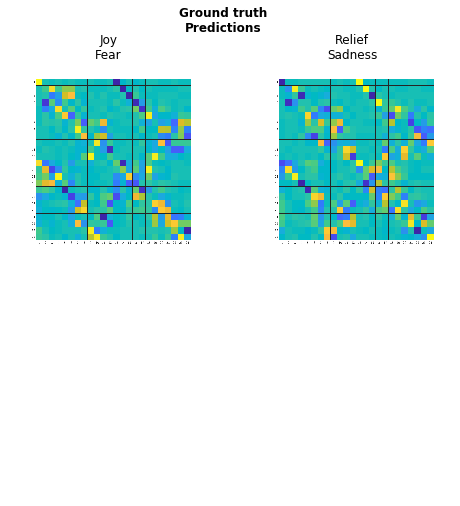

In [13]:
learn.show_results()

epoch,train_loss,valid_loss,time
0,2.119851,#na#,00:07
1,1.725688,#na#,00:07
2,2.104430,#na#,00:07
3,2.717890,#na#,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


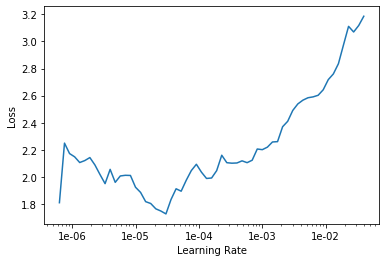

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,1.634028,26.985443,00:07
1,2.472307,12.496355,00:07
2,2.639470,8.071645,00:08
3,2.952198,5.738769,00:08
4,3.005982,2.500902,00:08


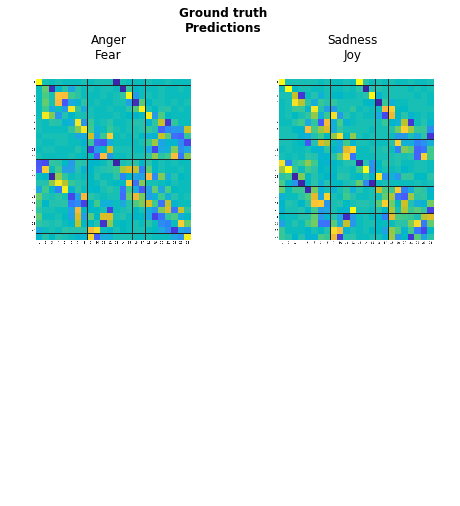

In [16]:
learn.show_results()

# Not enough samples. Averaging over the group should be left to the network. Regenerate with all subjects and try again.

In [16]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

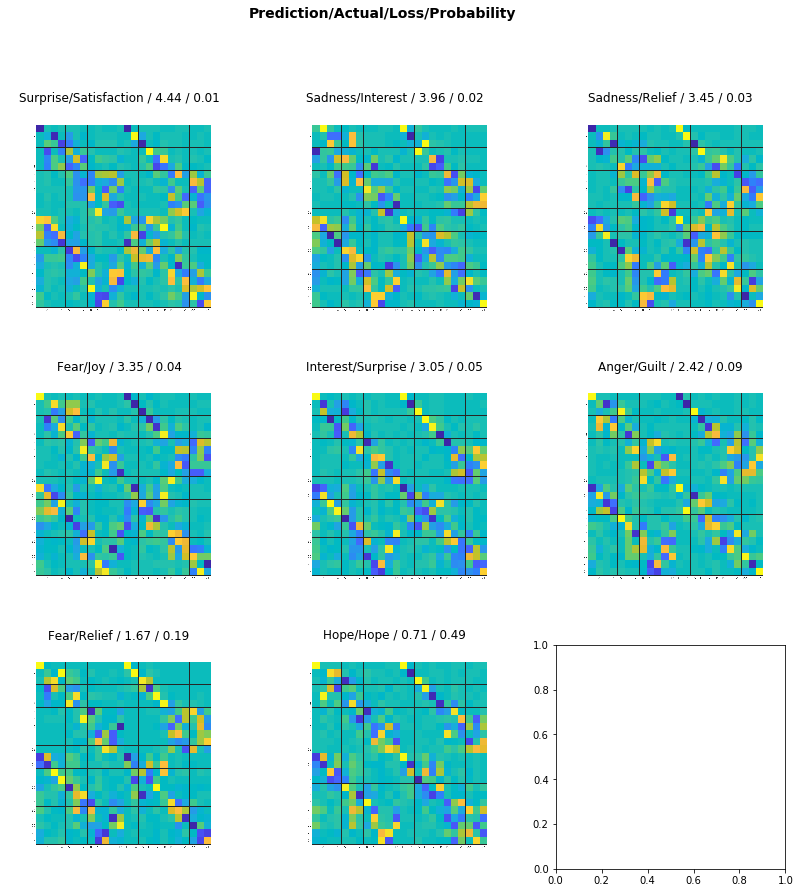

In [21]:
interp.plot_top_losses(8, figsize=(14,14))

:sadface: